<h1>Spaceship Titanic </h1>

Neste notebook é feita a análise do data Space Titanic presente no Kaggle. Uma competicao similar a ao do classico naufrago do titanica porem agora no espaco. Um breve resumo da historia:

"Bem-vindo ao ano de 2912, onde suas habilidades em ciência de dados são necessárias para resolver um mistério cósmico. Recebemos uma transmissão de quatro anos-luz de distância e as coisas não parecem boas. A nave espacial Titanic foi um transatlântico interestelar de passageiros lançado há um mês. Com quase 13.000 passageiros a bordo, a nave partiu em sua viagem inaugural transportando emigrantes do nosso sistema solar para três exoplanetas recém-habitáveis orbitando estrelas próximas. Enquanto contornava Alpha Centauri a caminho de seu primeiro destino - o tórrido 55 Cancri E - a desavisada nave Titanic colidiu com uma anomalia do espaço-tempo escondida dentro de uma nuvem de poeira. Infelizmente, ele encontrou um destino semelhante ao seu homônimo de 1000 anos antes. Embora a nave tenha permanecido intacta, quase metade dos passageiros foi transportada para uma dimensão alternativa!"

Primeiro é feito a exploração e análise inicial dos dados.
 
Perguntas a serem respondidas:
 
<li>Quem são os passageiros do Titanic? (idade, gênero, classe...)</li>
<li>Localização do passageiro e relação com a sua classe.</li>
<li>De onde os passageiros são? </li>
<li>Quais os fatores que ajudaram na sobrevivência? </li>


In [3]:
#Importando bibliotecas

#Manipulacao de dados
import numpy as np
import pandas as pd
import missingno

#Visualizacao de dados
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
spaceship_train_df =  pd.read_csv('train.csv')
spaceship_test_df = pd.read_csv('test.csv')

In [5]:
spaceship_train_df = spaceship_train_df.fillna(-1)
spaceship_test_df = spaceship_test_df.fillna(-1)

In [6]:
spaceship_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8693 non-null   object 
 2   CryoSleep     8693 non-null   object 
 3   Cabin         8693 non-null   object 
 4   Destination   8693 non-null   object 
 5   Age           8693 non-null   float64
 6   VIP           8693 non-null   object 
 7   RoomService   8693 non-null   float64
 8   FoodCourt     8693 non-null   float64
 9   ShoppingMall  8693 non-null   float64
 10  Spa           8693 non-null   float64
 11  VRDeck        8693 non-null   float64
 12  Name          8693 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [ ]:
spaceship_train_df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
spaceship_train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [ ]:
spaceship_train_df.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported'],
      dtype='object')

In [1]:
for col in spaceship_train_df.columns:
   # print(spaceship_train_df.groupby(col).count())

SyntaxError: ignored

<h1>Tratar null</h1>

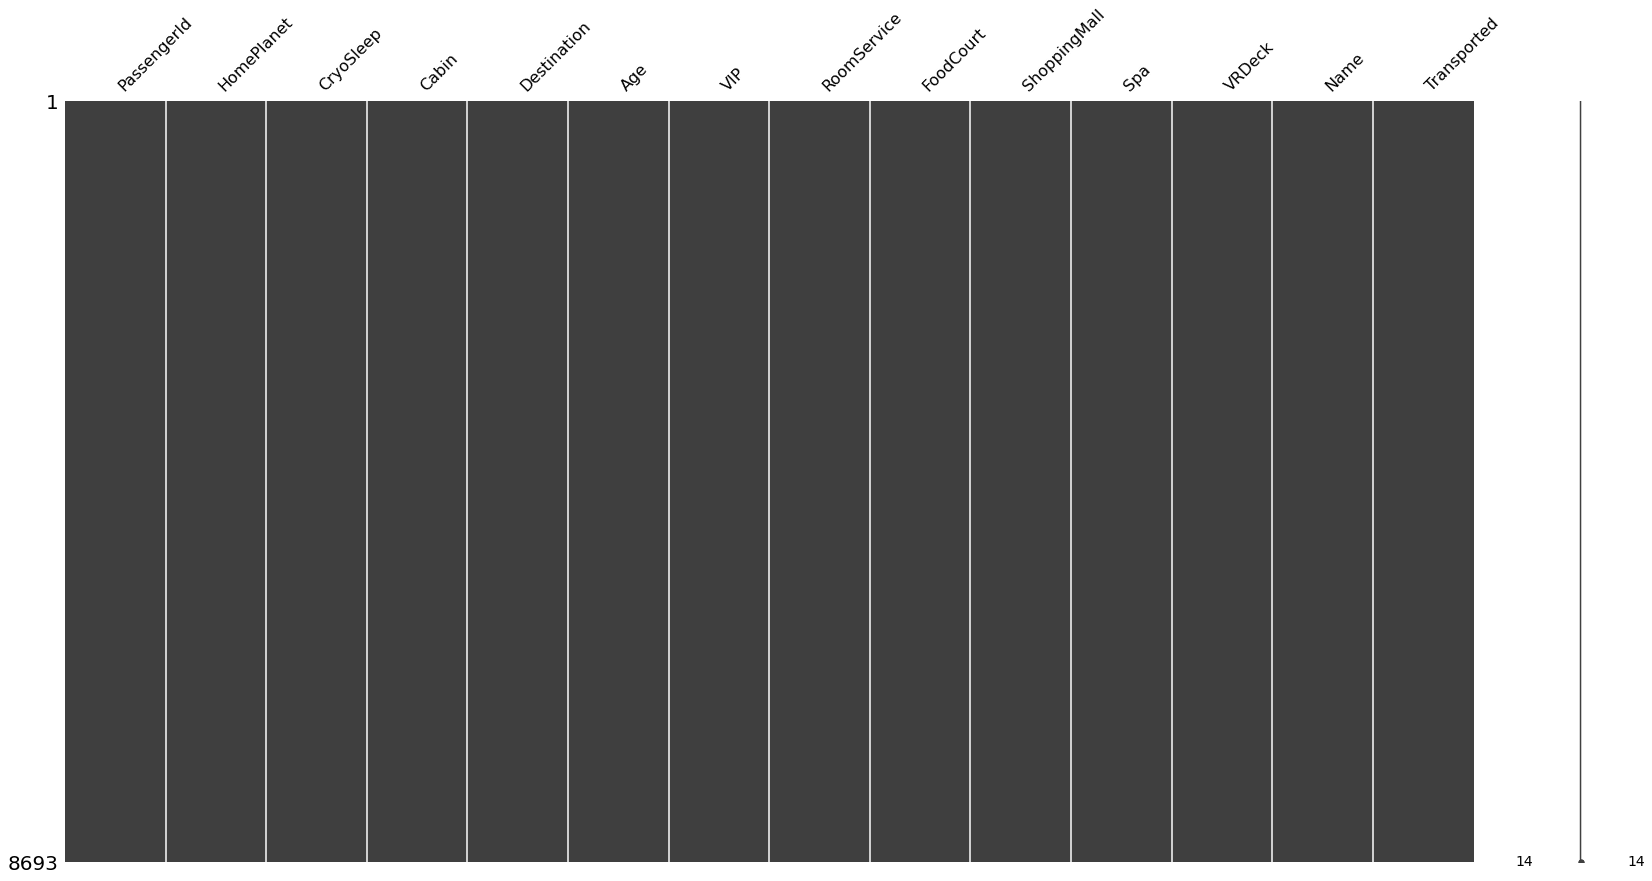

In [7]:
missingno.matrix(spaceship_train_df, figsize =(28, 14))

In [ ]:
spaceship_train_df.groupby('HomePlanet').count()

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
HomePlanet,,,,,,,,,,,,,
-1,201,201,201,201,201,201,201,201,201,201,201,201,201
Earth,4602,4602,4602,4602,4602,4602,4602,4602,4602,4602,4602,4602,4602
Europa,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131,2131
Mars,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759,1759


In [ ]:
spaceship_train_df.HomePlanet

0       Europa
1        Earth
2       Europa
3       Europa
4        Earth
         ...  
8688    Europa
8689     Earth
8690     Earth
8691    Europa
8692    Europa
Name: HomePlanet, Length: 8693, dtype: object

In [ ]:
spaceship_train_df.isnull().sum()

PassengerId     0
HomePlanet      0
CryoSleep       0
Cabin           0
Destination     0
Age             0
VIP             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
Name            0
Transported     0
dtype: int64

<h1> Quem são os passageiros do Titanic? </h1>

Histograma demonstrando a distribuição dos passageiros do spaceship.

In [ ]:
spaceship_train_df['Age'].mean()

28.213735189232715

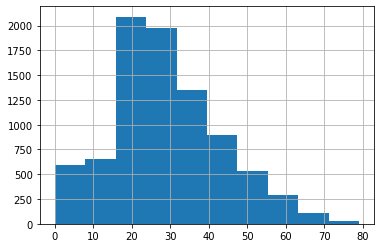

In [ ]:
spaceship_train_df['Age'].hist()

Nota-se que a idade média dos passageiros é de 28 anos.

In [17]:
def age_classification(passanger):
  age = passanger.Age
  if age < 18:
    return 'Child'
  elif age >= 18 and age <=60:
    return 'Adult'
  else:
    return 'Old'  

In [18]:
spaceship_train_df['Person'] = spaceship_train_df.apply(age_classification, axis=1)

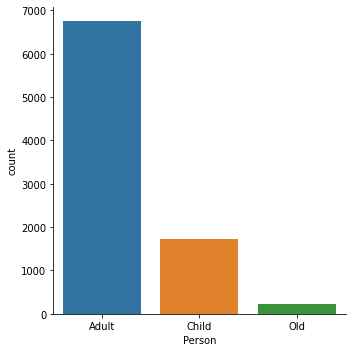

In [ ]:
sns.catplot(x='Person', data=spaceship_train_df, kind='count')

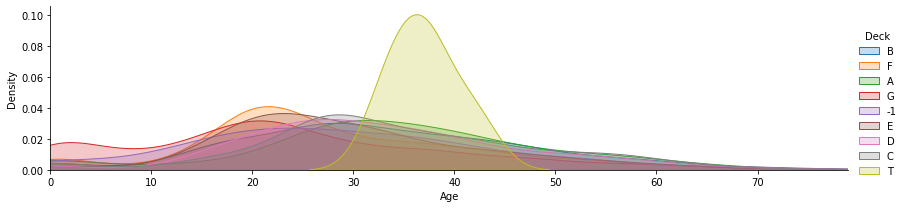

In [ ]:
fig = sns.FacetGrid(spaceship_train_df, hue='Deck',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = spaceship_train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

<h1>De onde os passageiros são?</h1>

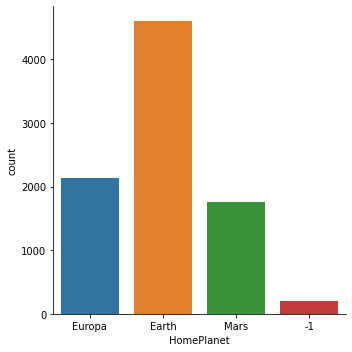

In [ ]:
sns.catplot(x='HomePlanet', data=spaceship_train_df, kind='count')

A maior parte dos passageiros embarcou em Earth, seguindo de Europa e logo Mars.

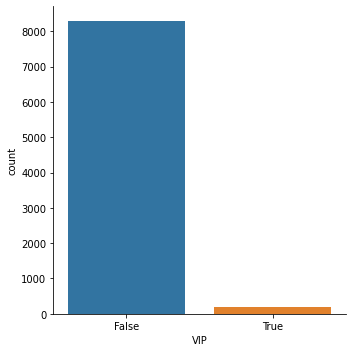

In [ ]:
sns.catplot(x='VIP', data=spaceship_train_df, kind='count')

In [ ]:
round(spaceship_train_df[spaceship_train_df==True].count().VIP/spaceship_train_df[spaceship_train_df==False].count().VIP,4)*100

2.4

Cerca de 2,4% dos passageiros são VIPs.


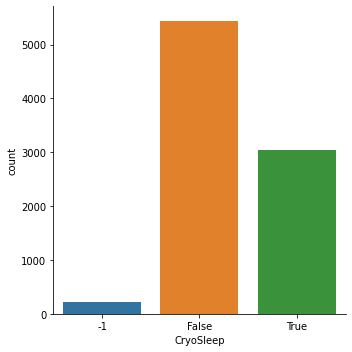

In [ ]:
sns.catplot(x='CryoSleep', data=spaceship_train_df, kind='count')

<h1>Localização do passageiro e relação com a sua classe.</h1>

In [9]:
def get_cabin(passanger, aux):
  cabin_num = str(passanger)
  if cabin_num != 'nan' and cabin_num != '-1' :
    cabin_num = cabin_num.split('/')
    return cabin_num[aux]
  else:
    return(cabin_num)

In [10]:
spaceship_train_df['Deck'] = spaceship_train_df.Cabin.apply(lambda x: get_cabin(x, 0))
spaceship_train_df['Num'] = spaceship_train_df.Cabin.apply(lambda x: get_cabin(x, 1))
spaceship_train_df['Side'] = spaceship_train_df.Cabin.apply(lambda x: get_cabin(x, 2))

Origem dos passageiros conforme o deck.

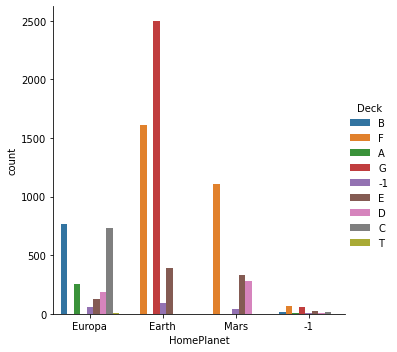

In [ ]:
sns.catplot(x='HomePlanet', data=spaceship_train_df, kind='count', hue='Deck')

Nota-se que os passageiros de origem em Europa estão localizados nos decks A,B e C demonstrando maior poder aquisitivo.


Destino dos passageiros conforme o deck.

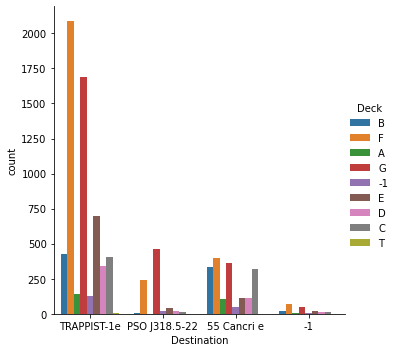

In [ ]:
sns.catplot(x='Destination', data=spaceship_train_df, kind='count', hue='Deck')

A maior parte dos passageiros tinha como destino TRAPPIST-1e.  Além disso, as classes A,B e C não têm como destino o planeta PSO J318.5-22.


In [ ]:
spaceship_train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Person,Deck,Num,Side
0,0001_01,0.0,0.0,B/0/P,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,B,0,P
1,0002_01,1.0,0.0,F/0/S,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,F,0,S
2,0003_01,0.0,0.0,A/0/S,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,A,0,S
3,0003_02,0.0,0.0,A/0/S,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,A,0,S
4,0004_01,1.0,0.0,F/1/S,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0.0,0.0,A/98/P,2.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,1,A,98,P
8689,9278_01,1.0,1.0,G/1499/S,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,1,G,1499,S
8690,9279_01,1.0,0.0,G/1500/S,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1,G,1500,S
8691,9280_01,0.0,0.0,E/608/S,2.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,E,608,S


In [11]:
spaceship_train_df['Transported'] = spaceship_train_df['Transported'].map({True: 1, False: 0})

In [12]:
spaceship_train_df['CryoSleep'] = spaceship_train_df['CryoSleep'].map({True: 1, False: 0})

In [13]:
spaceship_train_df['VIP'] = spaceship_train_df['VIP'].map({True: 1, False: 0})

In [14]:
spaceship_train_df['HomePlanet'] = spaceship_train_df['HomePlanet'].map({'Europa': 0, 'Earth': 1, 'Mars': 2})

In [19]:
spaceship_train_df['Person'] = spaceship_train_df['Person'].map({'Child': 0, 'Adult': 1, 'Old': 2})

In [16]:
spaceship_train_df['Destination'] = spaceship_train_df['Destination'].map({'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, '55 Cancri e': 2})

In [ ]:
spaceship_train_df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Person,Deck,Num,Side
0,0001_01,0.0,0.0,B/0/P,0.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,0,1,B,0,P
1,0002_01,1.0,0.0,F/0/S,0.0,24.0,0.0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,1,1,F,0,S
2,0003_01,0.0,0.0,A/0/S,0.0,58.0,1.0,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,0,1,A,0,S
3,0003_02,0.0,0.0,A/0/S,0.0,33.0,0.0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,0,1,A,0,S
4,0004_01,1.0,0.0,F/1/S,0.0,16.0,0.0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,0.0,0.0,A/98/P,2.0,41.0,1.0,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,0,1,A,98,P
8689,9278_01,1.0,1.0,G/1499/S,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,0,1,G,1499,S
8690,9279_01,1.0,0.0,G/1500/S,0.0,26.0,0.0,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,1,1,G,1500,S
8691,9280_01,0.0,0.0,E/608/S,2.0,32.0,0.0,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,0,1,E,608,S


In [ ]:
spaceship_train_df_plot = spaceship_train_df.drop(['PassengerId','Cabin', 'Name'])

<h1>Quais os fatores que ajudaram o envio a outra dimensao?</h1>

Distribuição dos passageiros conforme a classe, em que 1 representa passageiros que foram enviados a outra dimensão e 0 que não foram.

In [ ]:
#auxilio para verificar todos plots
for i in plot_aux:
  fig, ax = plt.subplots(figsize=(10,4))
  sns.catplot(x=i, data=spaceship_train_df, kind='count', hue='Transported')

Usando um mapa de correlação (mapa de calor) para visualizar as correlações rapidamente do que influenciou no transporte do passageiro.

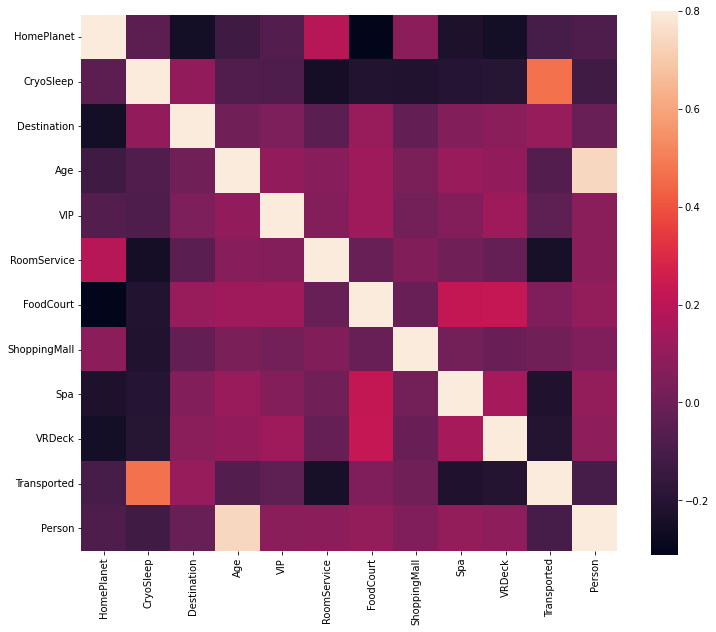

In [ ]:
corr = spaceship_train_df.corr()
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, vmax=.8, square=True)

Nota-se que na avaliação de transporte de outras variáveis, apenas o cyrosleep teve influência maior no transporte para outra dimensão. Também vale a pena chamar a atenção para o local de destino do passageiro.

<h2><li>Fator Idade</li>

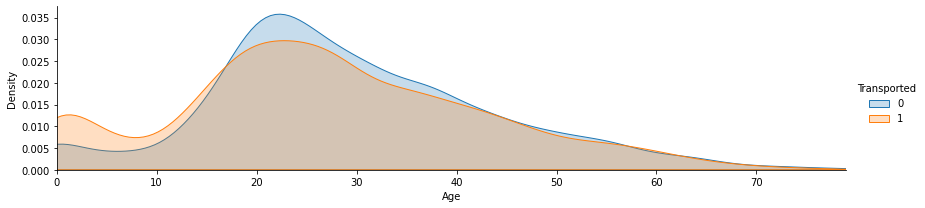

In [ ]:
fig = sns.FacetGrid(spaceship_train_df, hue='Transported',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)
oldest = spaceship_train_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Passageiros mais novos tiveram uma taxa de transporte maior, enquanto passageiros com idades por 25 anos não foram transportados. Passageiros de idades mais avançadas mantiveram a taxa de transporte para outra dimensão.


<h2><li>Fator Ciclo de sono</li>

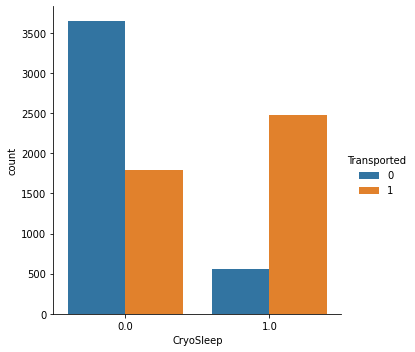

In [ ]:
sns.catplot(x='CryoSleep', data=spaceship_train_df, kind='count', hue='Transported')

Passageiros que optaram pela viagem acordados obtiveram mais sucesso em serem transportados para outra dimensão.


<h2><li>Fator Deck</li>

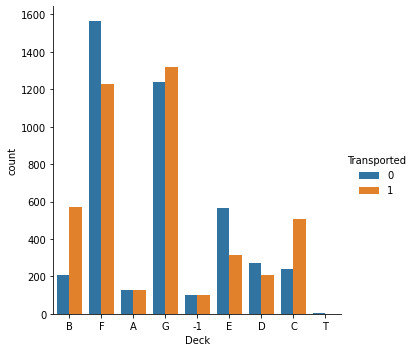

In [ ]:
sns.catplot(x='Deck', data=spaceship_train_df, kind='count', hue='Transported')

Nota-se que passageiros mais ricos, na classe A, tiveram a mesma taxa de envio e não envio à outra dimensão.


<h2><li>Fator Origem</li>

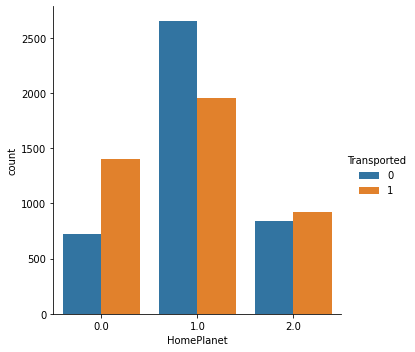

In [35]:
sns.catplot(x='HomePlanet', data=spaceship_train_df, kind='count', hue='Transported')

Aqueles com origem no planeta Europa tiveram maior chance de irem a outra dimensão, enquanto os que possuem origem na Earth 55 apresentam menor chance.

<h2><li>Fator Destination</li>

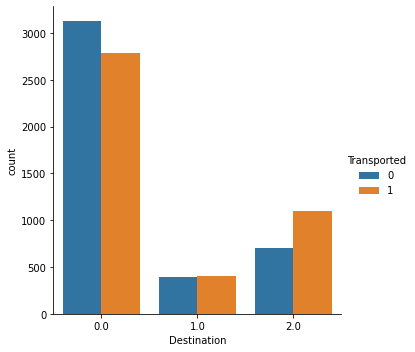

In [ ]:
sns.catplot(x='Destination', data=spaceship_train_df, kind='count', hue='Transported')

Passageiros com destino a TRAPPIST-1e tiveram menor chance de irem a outra dimensão, enquanto os que possuem destino 55 Cancri e apresentam maior chance.
 


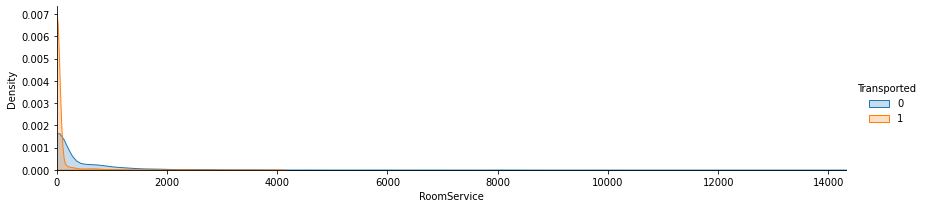

In [21]:
fig = sns.FacetGrid(spaceship_train_df, hue='Transported',aspect=4)
fig.map(sns.kdeplot,'RoomService',shade=True)
oldest = spaceship_train_df['RoomService'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

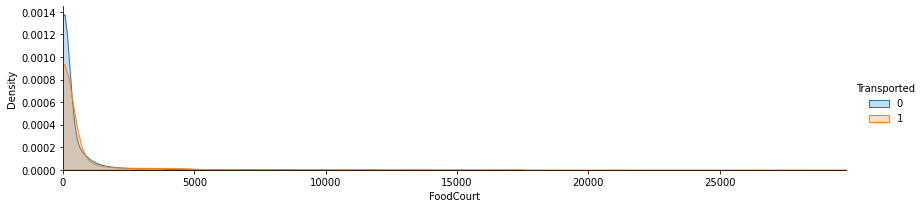

In [ ]:
fig = sns.FacetGrid(spaceship_train_df, hue='Transported',aspect=4)
fig.map(sns.kdeplot,'FoodCourt',shade=True)
oldest = spaceship_train_df['FoodCourt'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

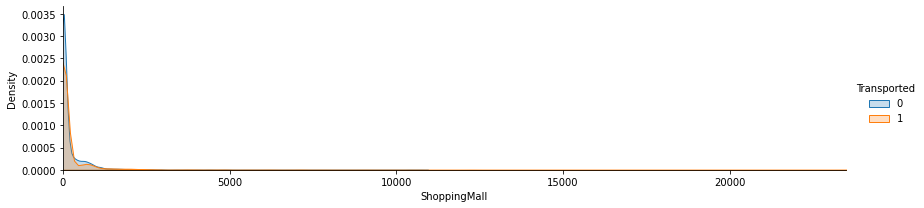

In [ ]:
fig = sns.FacetGrid(spaceship_train_df, hue='Transported',aspect=4)
fig.map(sns.kdeplot,'ShoppingMall',shade=True)
oldest = spaceship_train_df['ShoppingMall'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

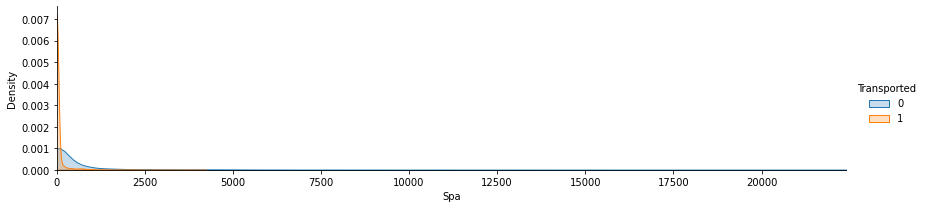

In [ ]:
fig = sns.FacetGrid(spaceship_train_df, hue='Transported',aspect=4)
fig.map(sns.kdeplot,'Spa',shade=True)
oldest = spaceship_train_df['Spa'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

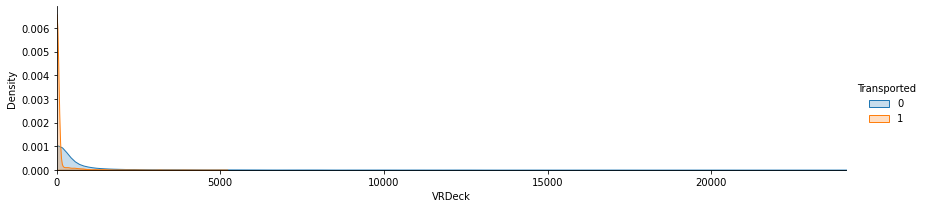

In [ ]:
fig = sns.FacetGrid(spaceship_train_df, hue='Transported',aspect=4)
fig.map(sns.kdeplot,'VRDeck',shade=True)
oldest = spaceship_train_df['VRDeck'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

Aparentemente os passageiros que consumiram uma pequena quantidade ou nenhuma de algum dos serviços oferecidos na spaceship tem mais chances de teletransporte.


De modo geral, os passageiros que apresentaram maior chance de serem teletransportados para outra dimensão foram aqueles que têm idade inferior a 18 anos, aqueles que estavam acordados evitando o ciclo de sono, presentes nos decks C e B, com origem no planeta Europa e destino planeta 55 Cancri.